# Gene-Disease Interaction Graph

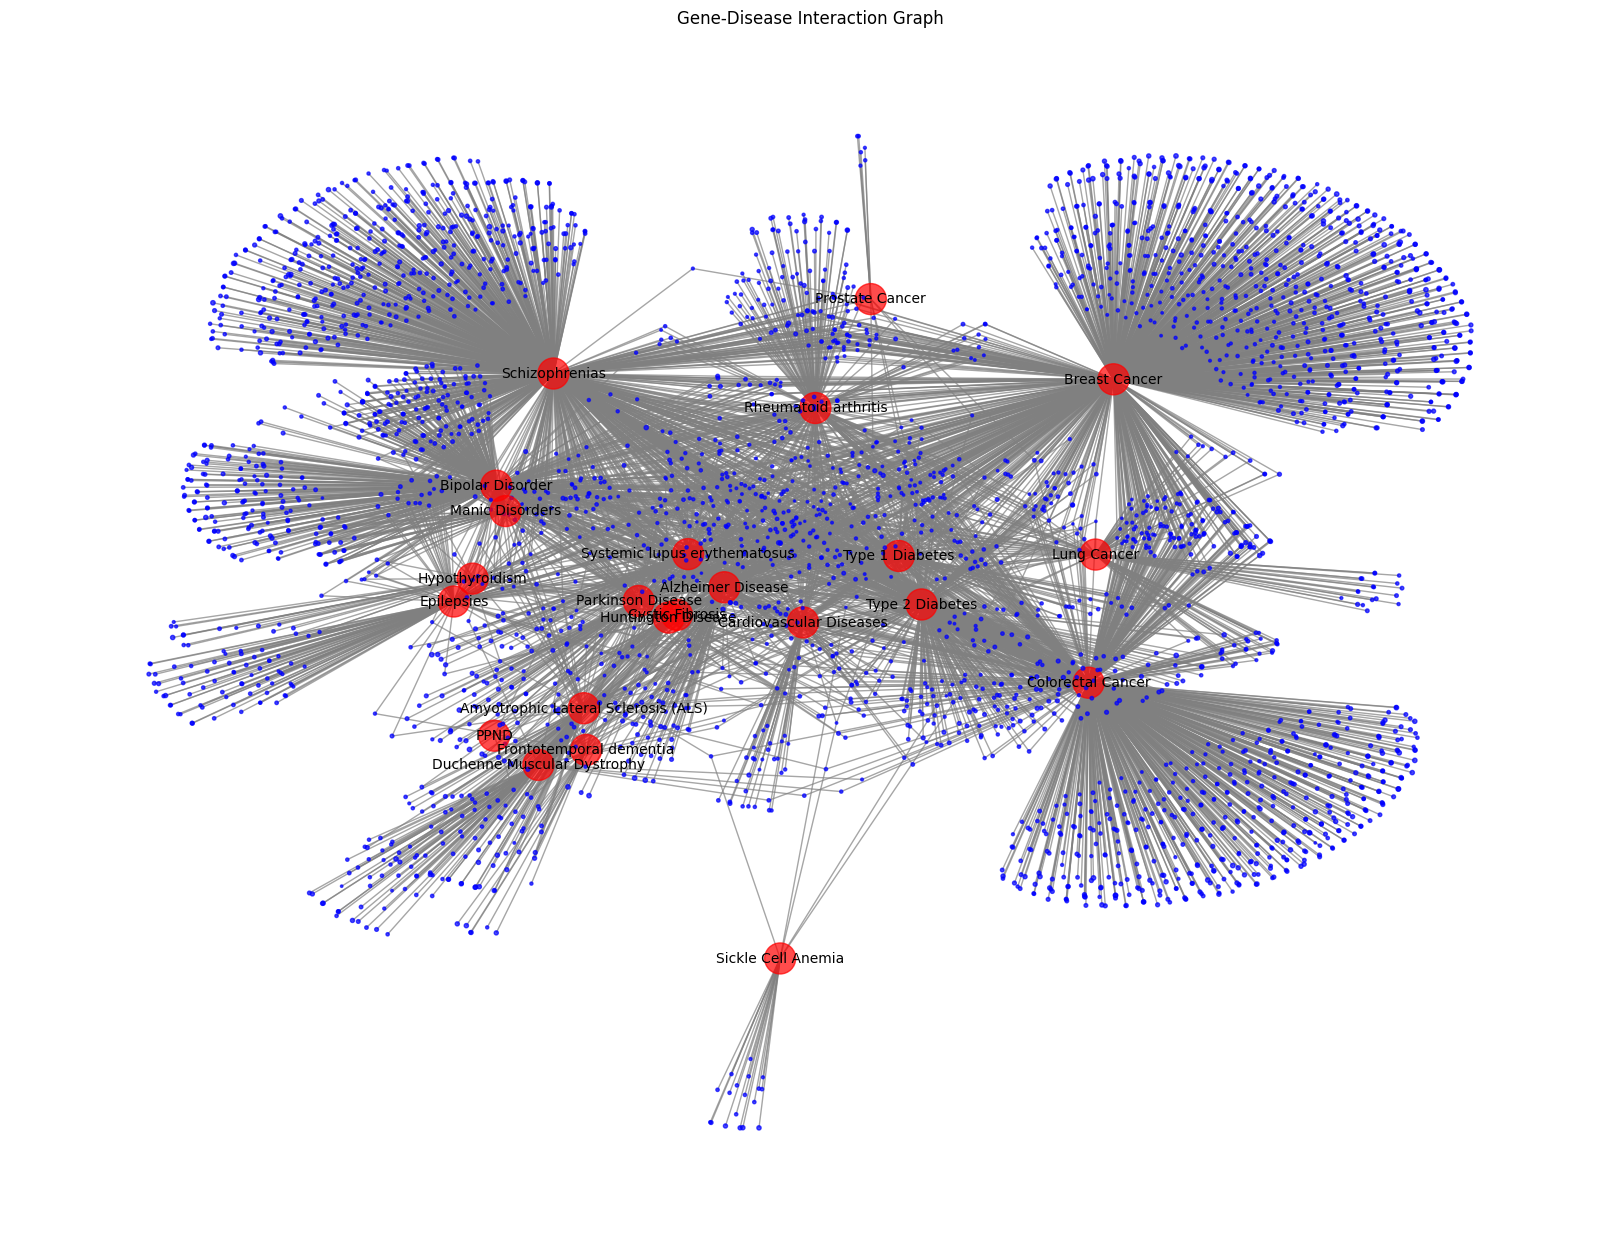

In [2]:
# Import Required Libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load and Explore Data
data = pd.read_csv('../data/finalized_data.csv', header=None, skiprows=1, names=['geneNciID', 'geneDSI', 'geneDPI', 'diseaseName', 'score', 'gene_index','disease_index'])

# Data Preprocessing
# Convert necessary columns to appropriate data types
data['geneNciID'] = data['geneNciID'].astype(int)
data['geneDSI'] = data['geneDSI'].astype(float)
data['geneDPI'] = data['geneDPI'].astype(float)
data['score'] = data['score'].astype(float)
data['gene_index'] = data['gene_index'].astype(int)
data['disease_index'] = data['disease_index'].astype(int)

# Create Graph
G = nx.Graph()

# Add nodes and edges
for _, row in data.iterrows():
    gene_node = row['geneNciID']
    disease_node = row['diseaseName']
    G.add_node(gene_node, type='gene', dsi=row['geneDSI'])
    G.add_node(disease_node, type='disease')
    G.add_edge(gene_node, disease_node, weight=row['score'])

# Visualize Graph
plt.figure(figsize=(16, 12))

# Define node colors based on type
node_colors = [
    'blue' if G.nodes[node]['type'] == 'gene' 
    else 'red' for node in G.nodes
]

# Define node sizes based on geneDSI
node_sizes = [G.nodes[node]['dsi'] * 10 if G.nodes[node]['type'] == 'gene' else 500 for node in G.nodes]


# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=node_sizes, font_size=8, edge_color='gray', alpha=0.7)

# Add labels only for disease nodes
disease_labels = {node: node for node in G.nodes if G.nodes[node]['type'] == 'disease'}
nx.draw_networkx_labels(G, pos, labels=disease_labels, font_size=10)

plt.title('Gene-Disease Interaction Graph')
plt.show()


# Frequency of Disease Synonyms

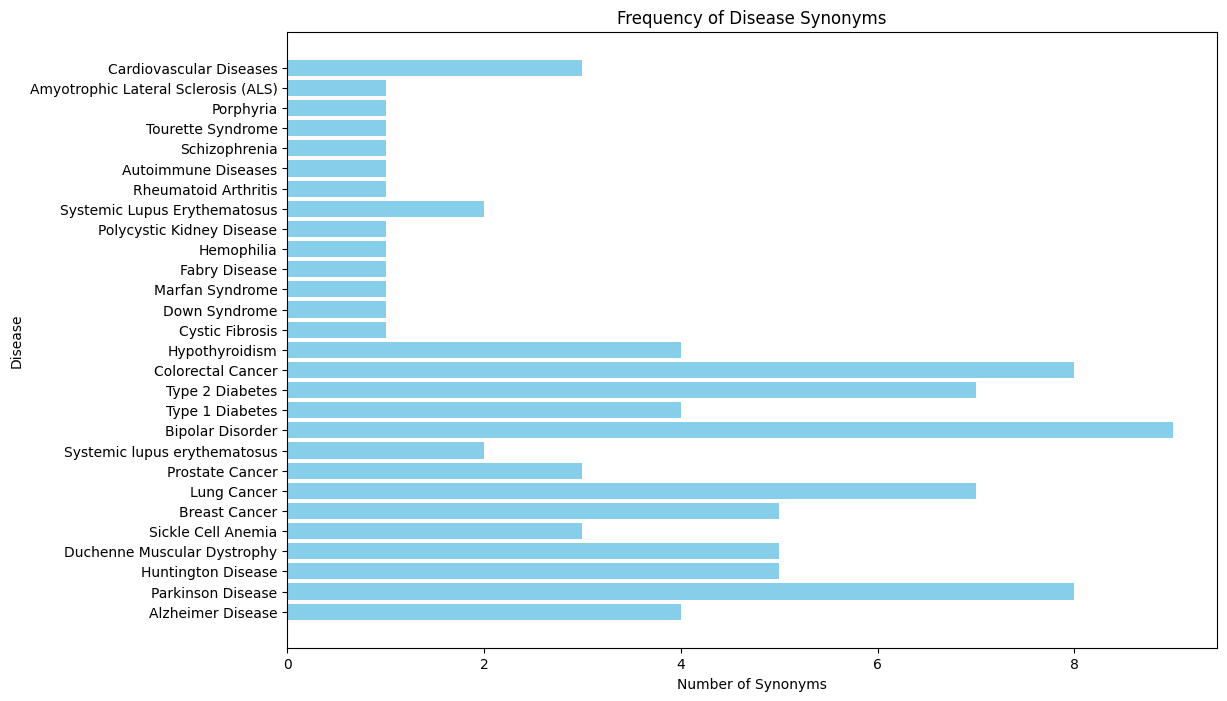

In [12]:
# Import Required Libraries
import matplotlib.pyplot as plt
from collections import Counter

# Define the mapping dictionary
disease_mapping = {
    "Alzheimer's disease": 'Alzheimer Disease',
    "Alzheimer's dementia senile and presenile forms": 'Alzheimer Disease',
    "familial alzheimer's disease": 'Alzheimer Disease',
    'AMYOTROPHIC LATERAL SCLEROSIS-PARKINSONISM/DEMENTIA COMPLEX 1': 'Parkinson Disease',
    "Parkinson's Disease": 'Parkinson Disease',
    "Primary Parkinsonism or Parkinson's disease": 'Parkinson Disease',
    "Idiopathic Parkinsonism or Parkinson's disease": 'Parkinson Disease',
    "Huntington's Disease": 'Huntington Disease',
    'HUNTINGTON DIS JUVENILE ONSET': 'Huntington Disease',
    "Dementia in Huntington's disease": 'Huntington Disease',
    'Dystrophies, Muscular':'Duchenne Muscular Dystrophy',
    'MUSCULAR DYSTROPHY, BECKER TYPE':'Duchenne Muscular Dystrophy',
    'Anemia, Diamond Blackfan':'Sickle Cell Anemia',
    'Anemia, Congenital Hypoplastic':'Sickle Cell Anemia',
    'CARCINOMA OF BREAST':'Breast Cancer',
    'Malignant neoplasm of lower lobe, bronchus or lung':'Lung Cancer',
    'Malignant neoplasm of other parts of bronchus or lung':'Lung Cancer',
    'Malignant neoplasm of middle lobe, bronchus or lung':'Lung Cancer',
    'Malignant neoplasm of upper lobe, bronchus or lung':'Lung Cancer',
    'CARCINOMA OF PROSTATE':'Prostate Cancer',
    'SYSTEMIC LUPUS ERYTHEMATOSIS':'Systemic lupus erythematosus',
    'SYSTEMIC LUPUS ERYTHEMATOSUS 16':'Systemic lupus erythematosus',
    'Bipolar I disorder':'Bipolar Disorder',
    'Mixed bipolar disorder, NOS':'Bipolar Disorder',
    'Bipolar II disorder':'Bipolar Disorder',
    'diabetes (mellitus) due to autoimmune process':'Type 1 Diabetes',
    'diabetes (mellitus) due to immune mediated pancreatic islet beta-cell destruction':'Type 1 Diabetes',
    'Diabetes Mellitus, Insulin-Dependent':'Type 1 Diabetes',
    'ketosis prone diabetes':'Type 2 Diabetes',
    'idiopathic diabetes (mellitus)':'Type 2 Diabetes',
    'Insulin-resistant diabetes mellitus':'Type 2 Diabetes',
    'NIDDM1':'Type 2 Diabetes',
    'CRC': 'Colorectal Cancer',
    'Malignant neoplasm of colon': 'Colorectal Cancer',
    'Malignant neoplasm of large intestine': 'Colorectal Cancer',
    'Congenital hypothyroidism':'Hypothyroidism',
    'secondary hypothyroidism (diagnosis)':'Hypothyroidism',
    'Primary hypothyroidism':'Hypothyroidism',
    'central hypothyroidism':'Hypothyroidism',
    # Alzheimer's Disease
    "Familial Alzheimer's Disease": "Alzheimer Disease",

    # Parkinson's Disease
    "Parkinson's Disease": "Parkinson Disease",
    "Hemiparkinsonism": "Parkinson Disease",
    "Primary Parkinsonism": "Parkinson Disease",
    "Idiopathic Parkinsonism": "Parkinson Disease",
    "Amyotrophic Lateral Sclerosis-Parkinsonism/Dementia Complex 1": "Parkinson Disease",
    
    # Huntington's Disease
    "Huntington's Disease": "Huntington Disease",
    "Chorea, Huntington": "Huntington Disease",
    "Dementia in Huntington's Disease": "Huntington Disease",
    
    # Duchenne Muscular Dystrophy
    "Duchenne Muscular Dystrophy": "Duchenne Muscular Dystrophy",
    "Duchenne Becker Muscular Dystrophy": "Duchenne Muscular Dystrophy",
    "Muscular Dystrophy, Duchenne": "Duchenne Muscular Dystrophy",
    
    # Sickle Cell Anemia
    "Sickle Cell Anemia": "Sickle Cell Anemia",
    
    # Cystic Fibrosis
    "Cystic Fibrosis": "Cystic Fibrosis",
    
    # Down Syndrome
    "Down Syndrome": "Down Syndrome",
    
    # Marfan Syndrome
    "Marfan Syndrome": "Marfan Syndrome",
    
    # Fabry Disease
    "Fabry Disease": "Fabry Disease",
    
    # Breast Cancer
    "Breast Neoplasms": "Breast Cancer",
    "Cancer, Breast": "Breast Cancer",
    "Carcinoma of Breast": "Breast Cancer",
    "Breast Cancer": "Breast Cancer",
    
    # Lung Cancer
    "Cancer, Lung": "Lung Cancer",
    "Malignant Neoplasm of Bronchus or Lung": "Lung Cancer",
    "Lung Cancer": "Lung Cancer",
    
    # Prostate Cancer
    "Carcinoma of Prostate": "Prostate Cancer",
    "Prostate Cancer": "Prostate Cancer",
    
    # Colorectal Cancer
    "Colorectal Neoplasm": "Colorectal Cancer",
    "Malignant Neoplasm of Colon": "Colorectal Cancer",
    "CRC (Colorectal Cancer)": "Colorectal Cancer",
    "Malignant Neoplasm of Large Intestine": "Colorectal Cancer",
    "Colorectal Cancer": "Colorectal Cancer",
    
    # Type 1 Diabetes
    "Type 1 Diabetes": "Type 1 Diabetes",
    
    # Type 2 Diabetes
    "Adult-Onset Diabetes Mellitus": "Type 2 Diabetes",
    "Insulin-Resistant Diabetes Mellitus": "Type 2 Diabetes",
    "Type 2 Diabetes": "Type 2 Diabetes",
    
    # Hemophilia
    "Hemophilia": "Hemophilia",
    
    # Polycystic Kidney Disease
    "Polycystic Kidney Disease": "Polycystic Kidney Disease",
    
    # Systemic Lupus Erythematosus
    "Lupus": "Systemic Lupus Erythematosus",
    "Systemic Lupus Erythematosus 16": "Systemic Lupus Erythematosus",
    
    # Rheumatoid Arthritis
    "Rheumatoid Arthritis": "Rheumatoid Arthritis",
    
    # Autoimmune Diseases
    "Autoimmune Diseases (e.g., Rheumatoid Arthritis)": "Autoimmune Diseases",
    
    # Schizophrenia
    "Schizophrenia": "Schizophrenia",
    
    # Bipolar Disorder
    "Bipolar Disorders": "Bipolar Disorder",
    "Bipolar I Disorder": "Bipolar Disorder",
    "Bipolar II Disorder": "Bipolar Disorder",
    "Bipolar Depression": "Bipolar Disorder",
    "Mixed Bipolar Disorder": "Bipolar Disorder",
    "NOS": "Bipolar Disorder",
    
    # Tourette Syndrome
    "Tourette Syndrome": "Tourette Syndrome",
    
    # Porphyria
    "Porphyria": "Porphyria",
    
    # Amyotrophic Lateral Sclerosis (ALS)
    "Amyotrophic Lateral Sclerosis": "Amyotrophic Lateral Sclerosis (ALS)",
    
    # Cardiovascular Diseases
    "Cardiovascular Disease": "Cardiovascular Diseases",
    "Cardiac Disease": "Cardiovascular Diseases",
    "Cardiovascular Diseases": "Cardiovascular Diseases"
}

# Count the frequency of each disease
disease_counts = Counter(disease_mapping.values())

# Prepare data for plotting
diseases = list(disease_counts.keys())
counts = list(disease_counts.values())

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.barh(diseases, counts, color='skyblue')
plt.xlabel('Number of Synonyms')
plt.ylabel('Disease')
plt.title('Frequency of Disease Synonyms')
plt.show()